Optimal number of clusters for Iris dataset: 9
Optimal number of clusters for Artificial dataset: 2


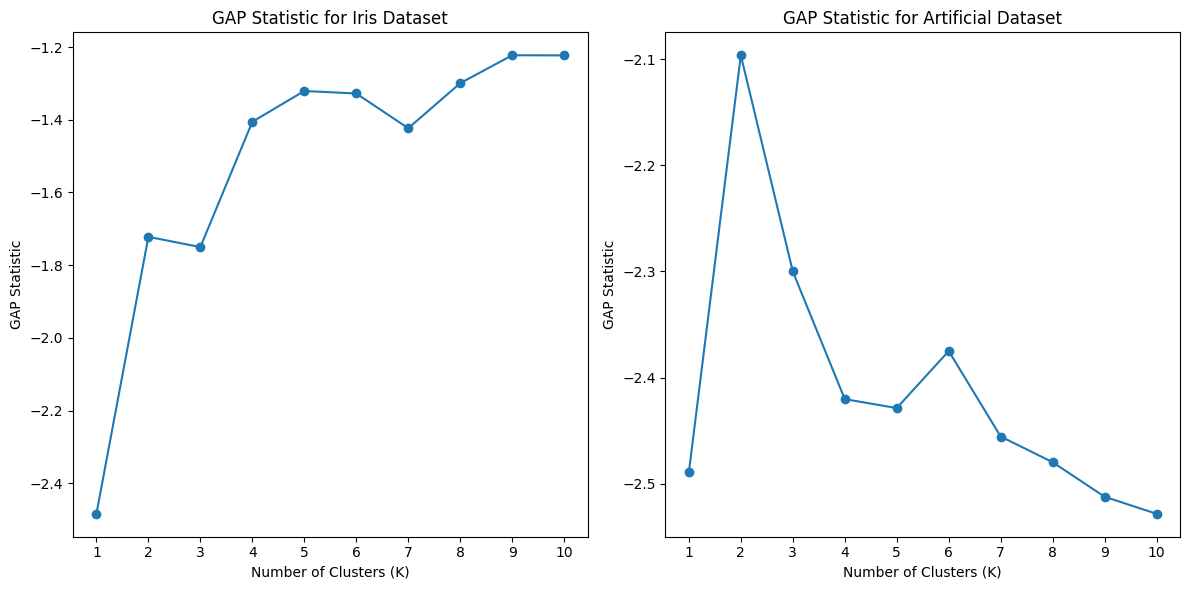

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
iris_data = iris.data

# Load the artificial dataset
data2024b = pd.read_csv('data2024b.csv') 
data2024b_values = data2024b[['V1', 'V2']].values

# Function to compute the GAP statistic
def gap_statistic(data, k_range, n_refs=10):
    # Calculate the log of within-cluster dispersion for observed data
    kmeans_results = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        dispersion = kmeans.inertia_  # Sum of squared distances to nearest cluster center
        kmeans_results.append(dispersion)

    # Create reference data
    refs = np.random.rand(n_refs, data.shape[0], data.shape[1])
    ref_dispersions = np.zeros((n_refs, len(k_range)))

    for i in range(n_refs):
        for j, k in enumerate(k_range):
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(refs[i])
            ref_dispersions[i, j] = kmeans.inertia_

    # Calculate the GAP statistic
    gap = np.mean(np.log(ref_dispersions), axis=0) - np.log(kmeans_results)
    return gap, kmeans_results

# Normalize the datasets
scaler = StandardScaler()
iris_data_std = scaler.fit_transform(iris_data)
data2024b_std = scaler.fit_transform(data2024b_values)

# Define range of K values
k_range = range(1, 11)

# Compute GAP statistics for Iris dataset
gap_iris, kmeans_results_iris = gap_statistic(iris_data_std, k_range)

# Compute GAP statistics for artificial dataset
gap_artificial, kmeans_results_artificial = gap_statistic(data2024b_std, k_range)

# Identify optimal number of clusters based on the GAP statistic
optimal_k_iris = np.argmax(gap_iris) + 1
optimal_k_artificial = np.argmax(gap_artificial) + 1

# Print the optimal number of clusters
print(f'Optimal number of clusters for Iris dataset: {optimal_k_iris}')
print(f'Optimal number of clusters for Artificial dataset: {optimal_k_artificial}')

# Plot the GAP statistics
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, gap_iris, marker='o')
plt.title('GAP Statistic for Iris Dataset')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('GAP Statistic')
plt.xticks(k_range)

plt.subplot(1, 2, 2)
plt.plot(k_range, gap_artificial, marker='o')
plt.title('GAP Statistic for Artificial Dataset')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('GAP Statistic')
plt.xticks(k_range)

plt.tight_layout()
plt.show()


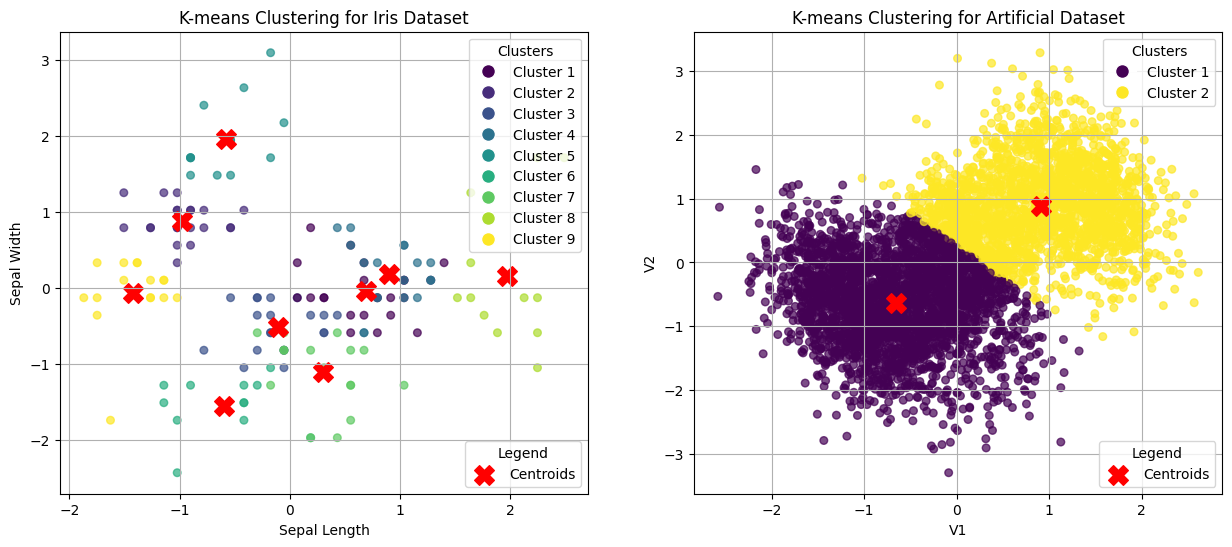

In [15]:
import matplotlib.pyplot as plt

# Function to plot K-means clusters
def plot_kmeans_clusters(data, kmeans, title, feature_names=None, k=0, i=0):

    plt.subplot(1, 2, i)
    
    # Plot the data points, colored by their cluster
    scatter =  plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis', s=30, alpha=0.7)
    
    # Plot the centroids of the clusters
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids', marker='X')

    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(k)]
    leg = plt.legend(handles, [f'Cluster {i+1}' for i in range(k)], title="Clusters")
    plt.legend(title="Legend", loc=4)
    plt.gca().add_artist(leg)
    
    plt.title(title)
    plt.xlabel(feature_names[0] if feature_names else 'Feature 1')
    plt.ylabel(feature_names[1] if feature_names else 'Feature 2')
    plt.grid(True)


plt.figure(figsize=(15, 6))


# Fit K-means on both datasets
kmeans_iris = KMeans(n_clusters=optimal_k_iris, random_state=42).fit(iris_data_std)
kmeans_artificial = KMeans(n_clusters=optimal_k_artificial, random_state=42).fit(data2024b_std)

# Plot Iris dataset clustering (using the first two features)
plot_kmeans_clusters(iris_data_std[:, :2], kmeans_iris, "K-means Clustering for Iris Dataset", feature_names=["Sepal Length", "Sepal Width"], k=9, i=1)

# Plot Artificial dataset clustering (using V1 and V2)
plot_kmeans_clusters(data2024b_std, kmeans_artificial, "K-means Clustering for Artificial Dataset", feature_names=["V1", "V2"], k=2, i=2)

plt.show()



In [16]:
# Report parameters for K-means model
def report_kmeans_params(kmeans_model, dataset_name):
    print(f"K-means Model Parameters for {dataset_name}:")
    print(f"Number of clusters: {kmeans_model.n_clusters}")
    
    # Cluster centroids
    print("\nCluster Centroids:")
    print(np.round(kmeans_model.cluster_centers_, 3))
    
    # Inertia (within-cluster sum of squares)
    print(f"\nInertia (Sum of Squared Distances to Centroids): {kmeans_model.inertia_:.3f}")
    
    # Cluster labels for data points
    print("\nCluster Labels (First 10 data points):")
    print(kmeans_model.labels_[:10])

# Fit K-means models 
kmeans_iris = KMeans(n_clusters=optimal_k_iris, random_state=42).fit(iris_data_std)
kmeans_artificial = KMeans(n_clusters=optimal_k_artificial, random_state=42).fit(data2024b_std)

# Report parameters for both datasets
report_kmeans_params(kmeans_iris, "Iris Dataset")
report_kmeans_params(kmeans_artificial, "Artificial Dataset")


K-means Model Parameters for Iris Dataset:
Number of clusters: 9

Cluster Centroids:
[[ 0.691 -0.048  0.603  0.492]
 [-0.976  0.877 -1.305 -1.234]
 [-0.107 -0.512  0.268  0.146]
 [ 0.903  0.175  1.003  1.376]
 [-0.574  1.957 -1.27  -1.204]
 [-0.598 -1.552 -0.028 -0.087]
 [ 0.303 -1.11   0.724  0.741]
 [ 1.977  0.156  1.445  1.12 ]
 [-1.423 -0.074 -1.333 -1.324]]

Inertia (Sum of Squared Distances to Centroids): 55.707

Cluster Labels (First 10 data points):
[1 8 8 8 1 4 1 1 8 8]
K-means Model Parameters for Artificial Dataset:
Number of clusters: 2

Cluster Centroids:
[[-0.652 -0.633]
 [ 0.912  0.885]]

Inertia (Sum of Squared Distances to Centroids): 4227.916

Cluster Labels (First 10 data points):
[1 1 0 1 0 0 1 1 0 0]
